In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

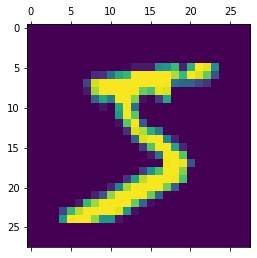

In [7]:
import matplotlib.pyplot as plt
plt.matshow(x_train[0])

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
import keras
model = Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model

In [13]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
H = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2110 - accuracy: 0.9416 - val_loss: 0.1975 - val_accuracy: 0.9449
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1958 - accuracy: 0.9456 - val_loss: 0.1876 - val_accuracy: 0.9461
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1828 - accuracy: 0.9490 - val_loss: 0.1775 - val_accuracy: 0.9482
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1720 - accuracy: 0.9512 - val_loss: 0.1679 - val_accuracy: 0.9517
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1622 - accuracy: 0.9547 - val_loss: 0.1592 - val_accuracy: 0.9541


In [17]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print('Loss %.3f' % test_loss)
print('Accuracy %.3f' % test_acc)

313/313 [==============================] - 0s 836us/step - loss: 0.1592 - accuracy: 0.9541
Loss 0.159
Accuracy 0.954


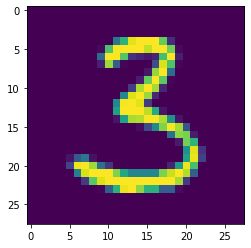

In [19]:
import random
n = random.randint(0,9999)

plt.imshow(x_test[n])
plt.show()

In [20]:
prediction = model.predict(x_test)
print("The Handwritten number is %d " %np.argmax(prediction[n]))

313/313 [==============================] - 0s 792us/step
The Handwritten number is 3 


In [22]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

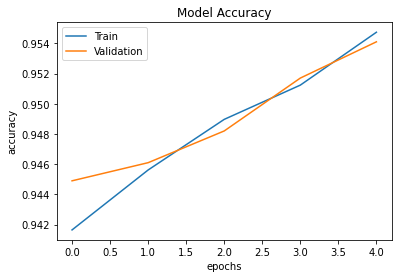

In [24]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

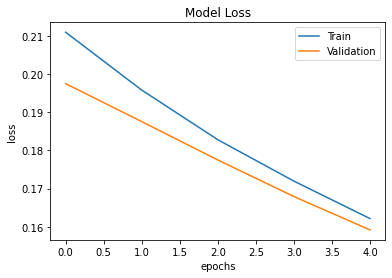

In [27]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Validation'], loc="upper right")
plt.show()

<AxesSubplot:>

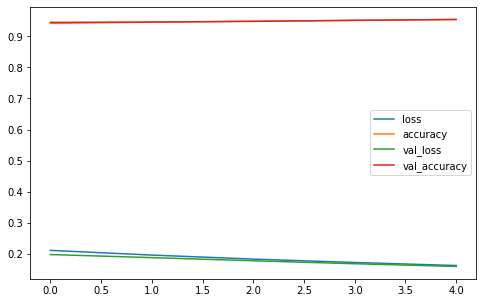

In [31]:
pd.DataFrame(H.history).plot(figsize = (8,5))